In [1]:
%load_ext autoreload
%autoreload 2

#making sure we have necessary versions
import sys
assert sys.version_info>=(3,5)
import sklearn
assert sklearn.__version__ >= "0.2" 

# user written functions to make life easier
import util

In [2]:
# set up matplotlib for prinitng figures
import matplotlib as mpl
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# for storing data
import os
datapath = os.path.join("datasets", "lifesat","")

#downloading the data 
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [4]:
# finally starting to look at the data

#some required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model # will come back to this for efficient way to import

# loading the data
oecd_df = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands = ",")
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands = ",",
                            delimiter='\t', encoding='latin1', na_values="n/a") #very weird csv fil
gdp_per_capita.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0


In [5]:
oecd_df.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN


In [6]:
## preparing the data

'''
- util function prepare_country_states make changes in the both the dfs itself before merging it, 
- which makes it not suitable to keep re-running this multiple times, 
- ideally, here it is supposed to be run only once, so its fine, 
- but, better to develop a function which does not make chnages in the df so easy to rerun
'''

country_stats=util.prepare_country_stats(oecd_df, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# removing dfs, which are no longer necessary
del oecd_df
del gdp_per_capita

country_stats.head(3)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


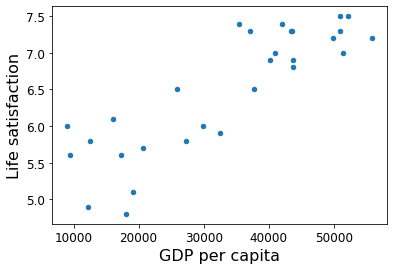

In [7]:
# let's visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

In [8]:
# beautiful, seems like a linear relationship, although noise surely seems high

In [9]:
# select a linear model

linear_reg_model = sklearn.linear_model.LinearRegression()

linear_reg_model.fit(X,y)

LinearRegression()

In [13]:
# prediction for a new X 

X_new = [[25000]]
linear_reg_model.predict(X_new)

array([[6.08093895]])

In [ ]:
# that was simple !!